# Evaluation Project 3 - Avocado Project

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.shape

(18249, 14)

## Case 1 - Average Price is the target/label
<br>
For this, since the target or dependent variable data is continuous in nature, we will use regression to build our model.

## Dataframe description

The data was downloaded from the Hass Avocado Board website in May 2018. Avocado is a fruit consumed by people heavily in the United States. The table represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers' cash registers based on actual retail sales of Hass Avocados.

The average price in the table represents a per unit cost, even when multiple units are sold in bags.

The Product Lookup Codes in the table are only for Hass Avocados. Other varieties of avocados are not included in the table.

Some relevant columns in the dataset:
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

**Findings:**
- The columns contain both categorical and continuous data
- the column "Unnamed" shows the index, so it is irrelevant and may be dropped.

In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## EDA

In [5]:
df.shape

(18249, 13)

In [6]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

**Findings:**
- The columns contain three different data types - object, float64 and int64
- The 3 columns containing object data types may need to be encoded.
- Date column needs to be converted into the correct datatype as it is showing as object

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

**Converting date into dates and months separately as there is a separate column for Year**

In [8]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop("Date",axis=1,inplace=True)

In [9]:
df.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,11,22
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,11,15
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,11,8
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,11,1
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,10,25


In [10]:
df.shape

(18249, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [12]:
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [13]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

**Findings:**
- we have the info about the indexing type, column type and non-null values
- the info for the unique values in each of the columns is available
- no null values are present in the dataset

In [14]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


**Findings:**
- Some columns have very high standard deviation, which may be reflective of skewness.
- Also, as evident from the the comparison of mean, 25%, 50%, 75% and max, some columns have extreme values, which are indicative of outliers

<AxesSubplot:>

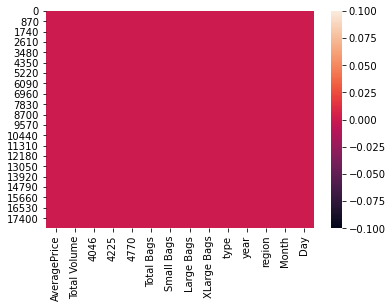

In [15]:
sns.heatmap(df.isnull())

In [16]:
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: int64

In [17]:
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

## Visualising the dataset

conventional    9126
organic         9123
Name: type, dtype: int64


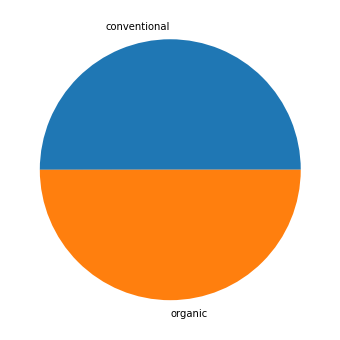

In [18]:
print(df['type'].value_counts())
labels = 'conventional','organic'
fig,ax = plt.subplots(figsize=(10,6))
ax.pie(df['type'].value_counts(), labels=labels)
plt.show()

Pittsburgh             338
MiamiFtLauderdale      338
Nashville              338
StLouis                338
Denver                 338
NewYork                338
BuffaloRochester       338
HartfordSpringfield    338
TotalUS                338
Chicago                338
Southeast              338
Boston                 338
Atlanta                338
West                   338
Indianapolis           338
SouthCentral           338
DallasFtWorth          338
Philadelphia           338
Tampa                  338
Seattle                338
LasVegas               338
Albany                 338
PhoenixTucson          338
RichmondNorfolk        338
Louisville             338
Spokane                338
Plains                 338
Orlando                338
CincinnatiDayton       338
Portland               338
BaltimoreWashington    338
GrandRapids            338
RaleighGreensboro      338
Roanoke                338
California             338
GreatLakes             338
NewOrleansMobile       338
S

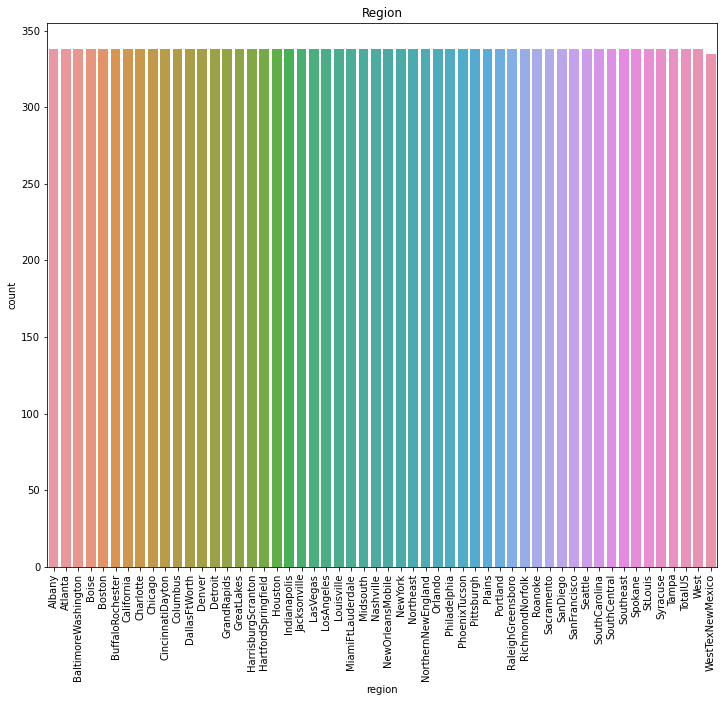

In [19]:
print(df['region'].value_counts())
plt.figure(figsize=(12,10))
sns.countplot(df['region'])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

**Findings:**
- types of avocados sold are almost equal
- the count of avocados is same across all regions at 338, with West Texas, New Mexico at 335.

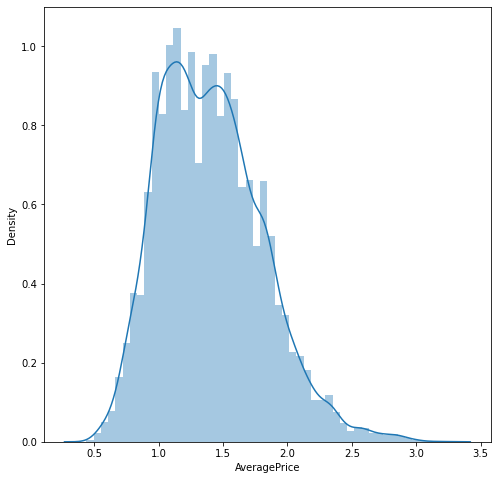

In [20]:
# data distribution in target
plt.figure(figsize=(8,8))
sns.distplot(df['AveragePrice'])
plt.show()

In [21]:
df1 = df.drop(['type','region'],axis=1)
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29


**Finding:** The distribution in the target/label is slightly skewed to the right, however, almost normal.

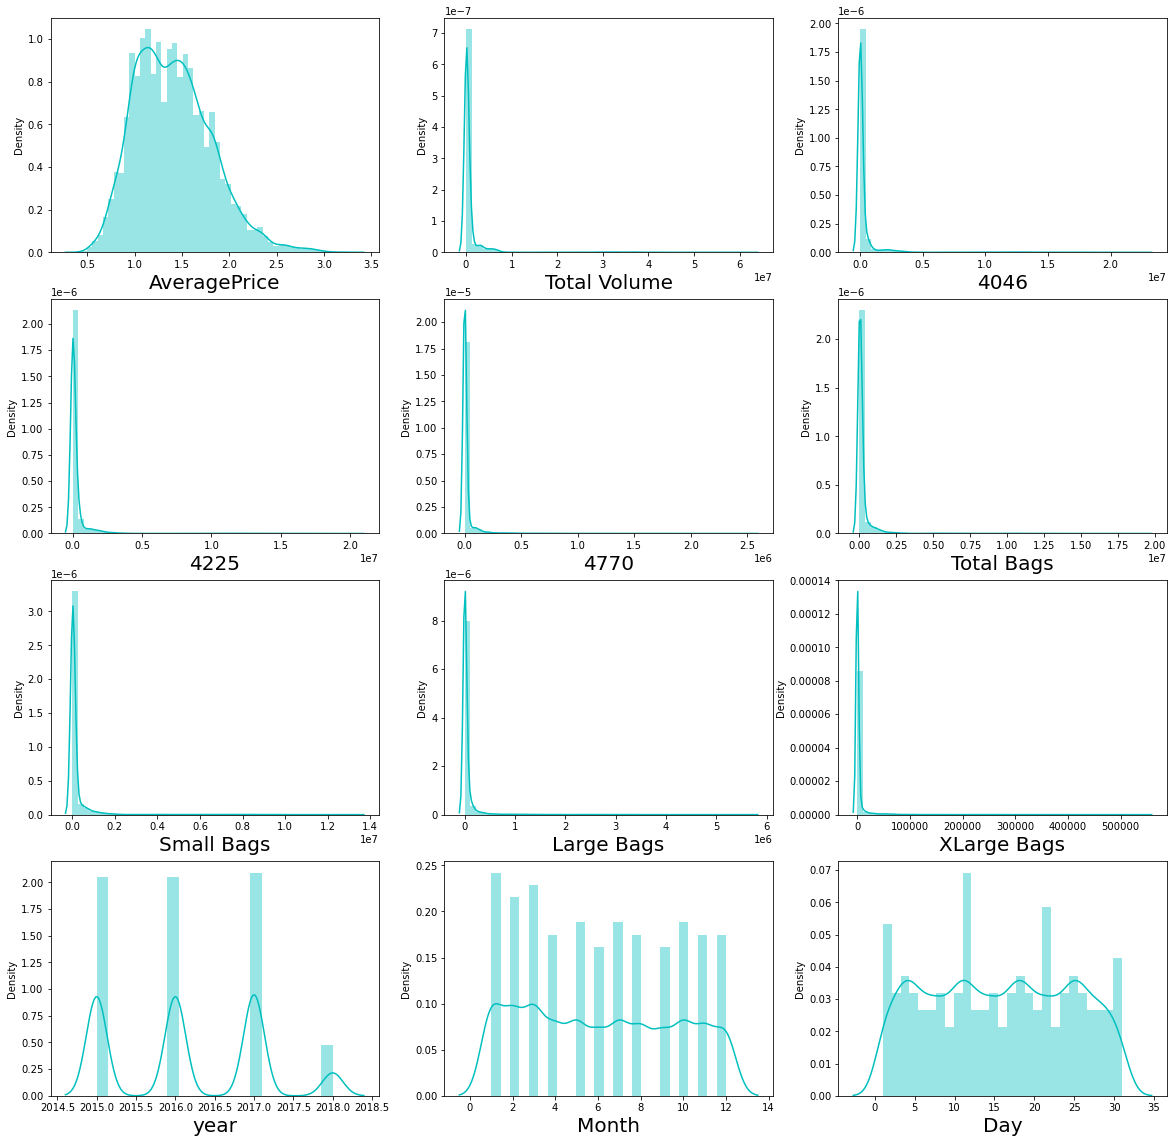

In [22]:
# data distribution in features
plt.figure(figsize=(20,25))
plotnumber = 1

for col in df1:
    if plotnumber<=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df1[col],color='c')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

**Findings:** Data in all columns is right (positive) skewed (except for year, month and day), with extremely high skewness in all columns except for AveragePrice. This is a clear indictor of the presence of extreme values and outliers, which will need to be removed.

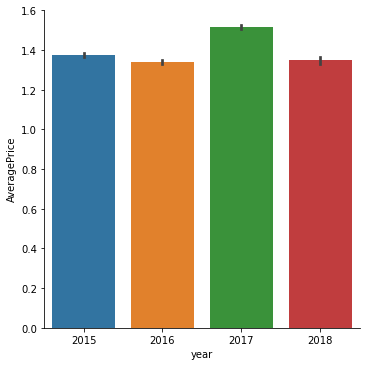

In [23]:
sns.catplot(x = "year", y = "AveragePrice", kind ='bar', data=df, linewidth=2)

Average prices dropped in 2016 but reached their highest in 2017, before dropping to levels to that of 2016, in 2018.

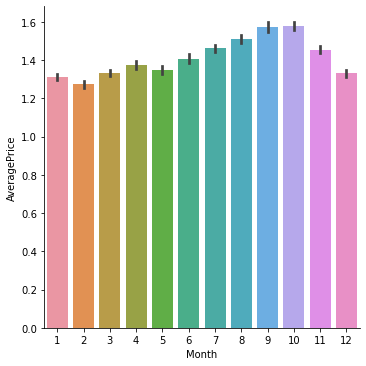

In [24]:
sns.catplot(x = "Month", y = "AveragePrice", kind ='bar', data=df, linewidth=2)

The average prices of the avocados start to fall from November, and continue to invariably rise till August, finally reach their peak avg pricing during September and October months.

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

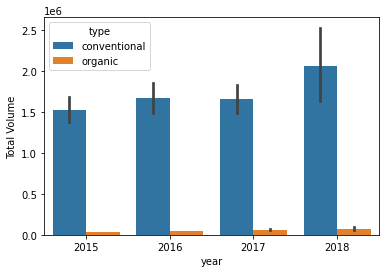

In [25]:
sns.barplot(x='year', y='Total Volume', hue='type',data=df)

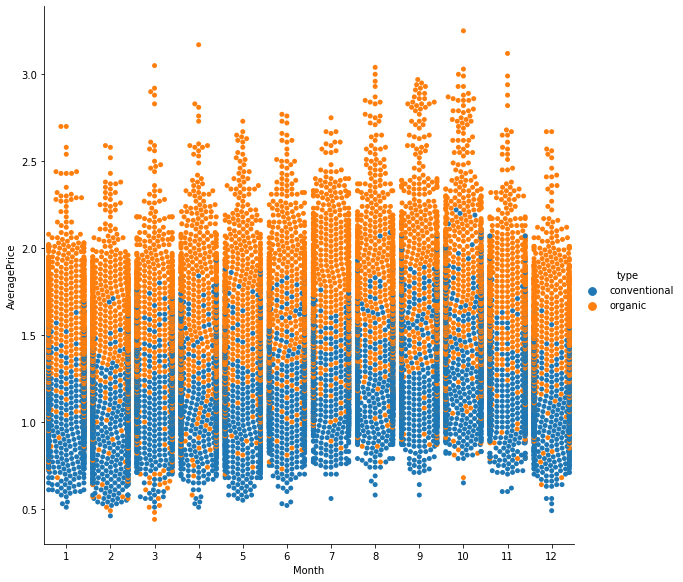

In [26]:
sns.catplot(x='Month', y='AveragePrice', hue='type', kind = 'swarm', data=df, height=8)

**Findings:** The avg price of conventional avocados is lower in comparison to that of organic avocados. As seen earlier as well, the avg price of both types of avocados rises in the months of August, September and October. Some outliers of high avg price are also evident in the months of March and April.

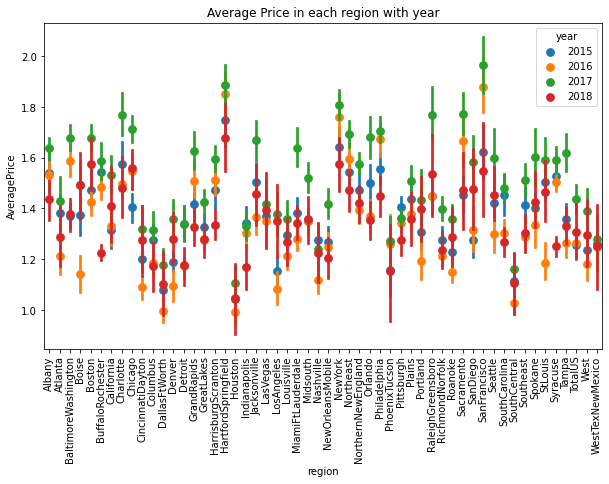

In [27]:
plt.figure(figsize=(10,6))
plt.title("Average Price in each region with year")
sns.pointplot(x='region',y='AveragePrice',data=df,hue='year',join=False)
plt.xticks(rotation=90)
plt.show()

**Findings:** Avg price is evidently higher in San Francisco, followed by Harford Springfield and Raleigh Greensboro.

<AxesSubplot:xlabel='Total Bags', ylabel='Total Volume'>

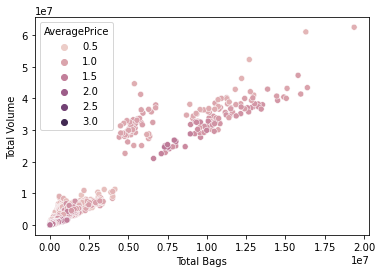

In [28]:
sns.scatterplot(data=df,x='Total Bags', y ='Total Volume',hue='AveragePrice')

**Findings:** A reasonably linear relationship between Total Bags and Total Volume is clearly evident from the scatterplot above.

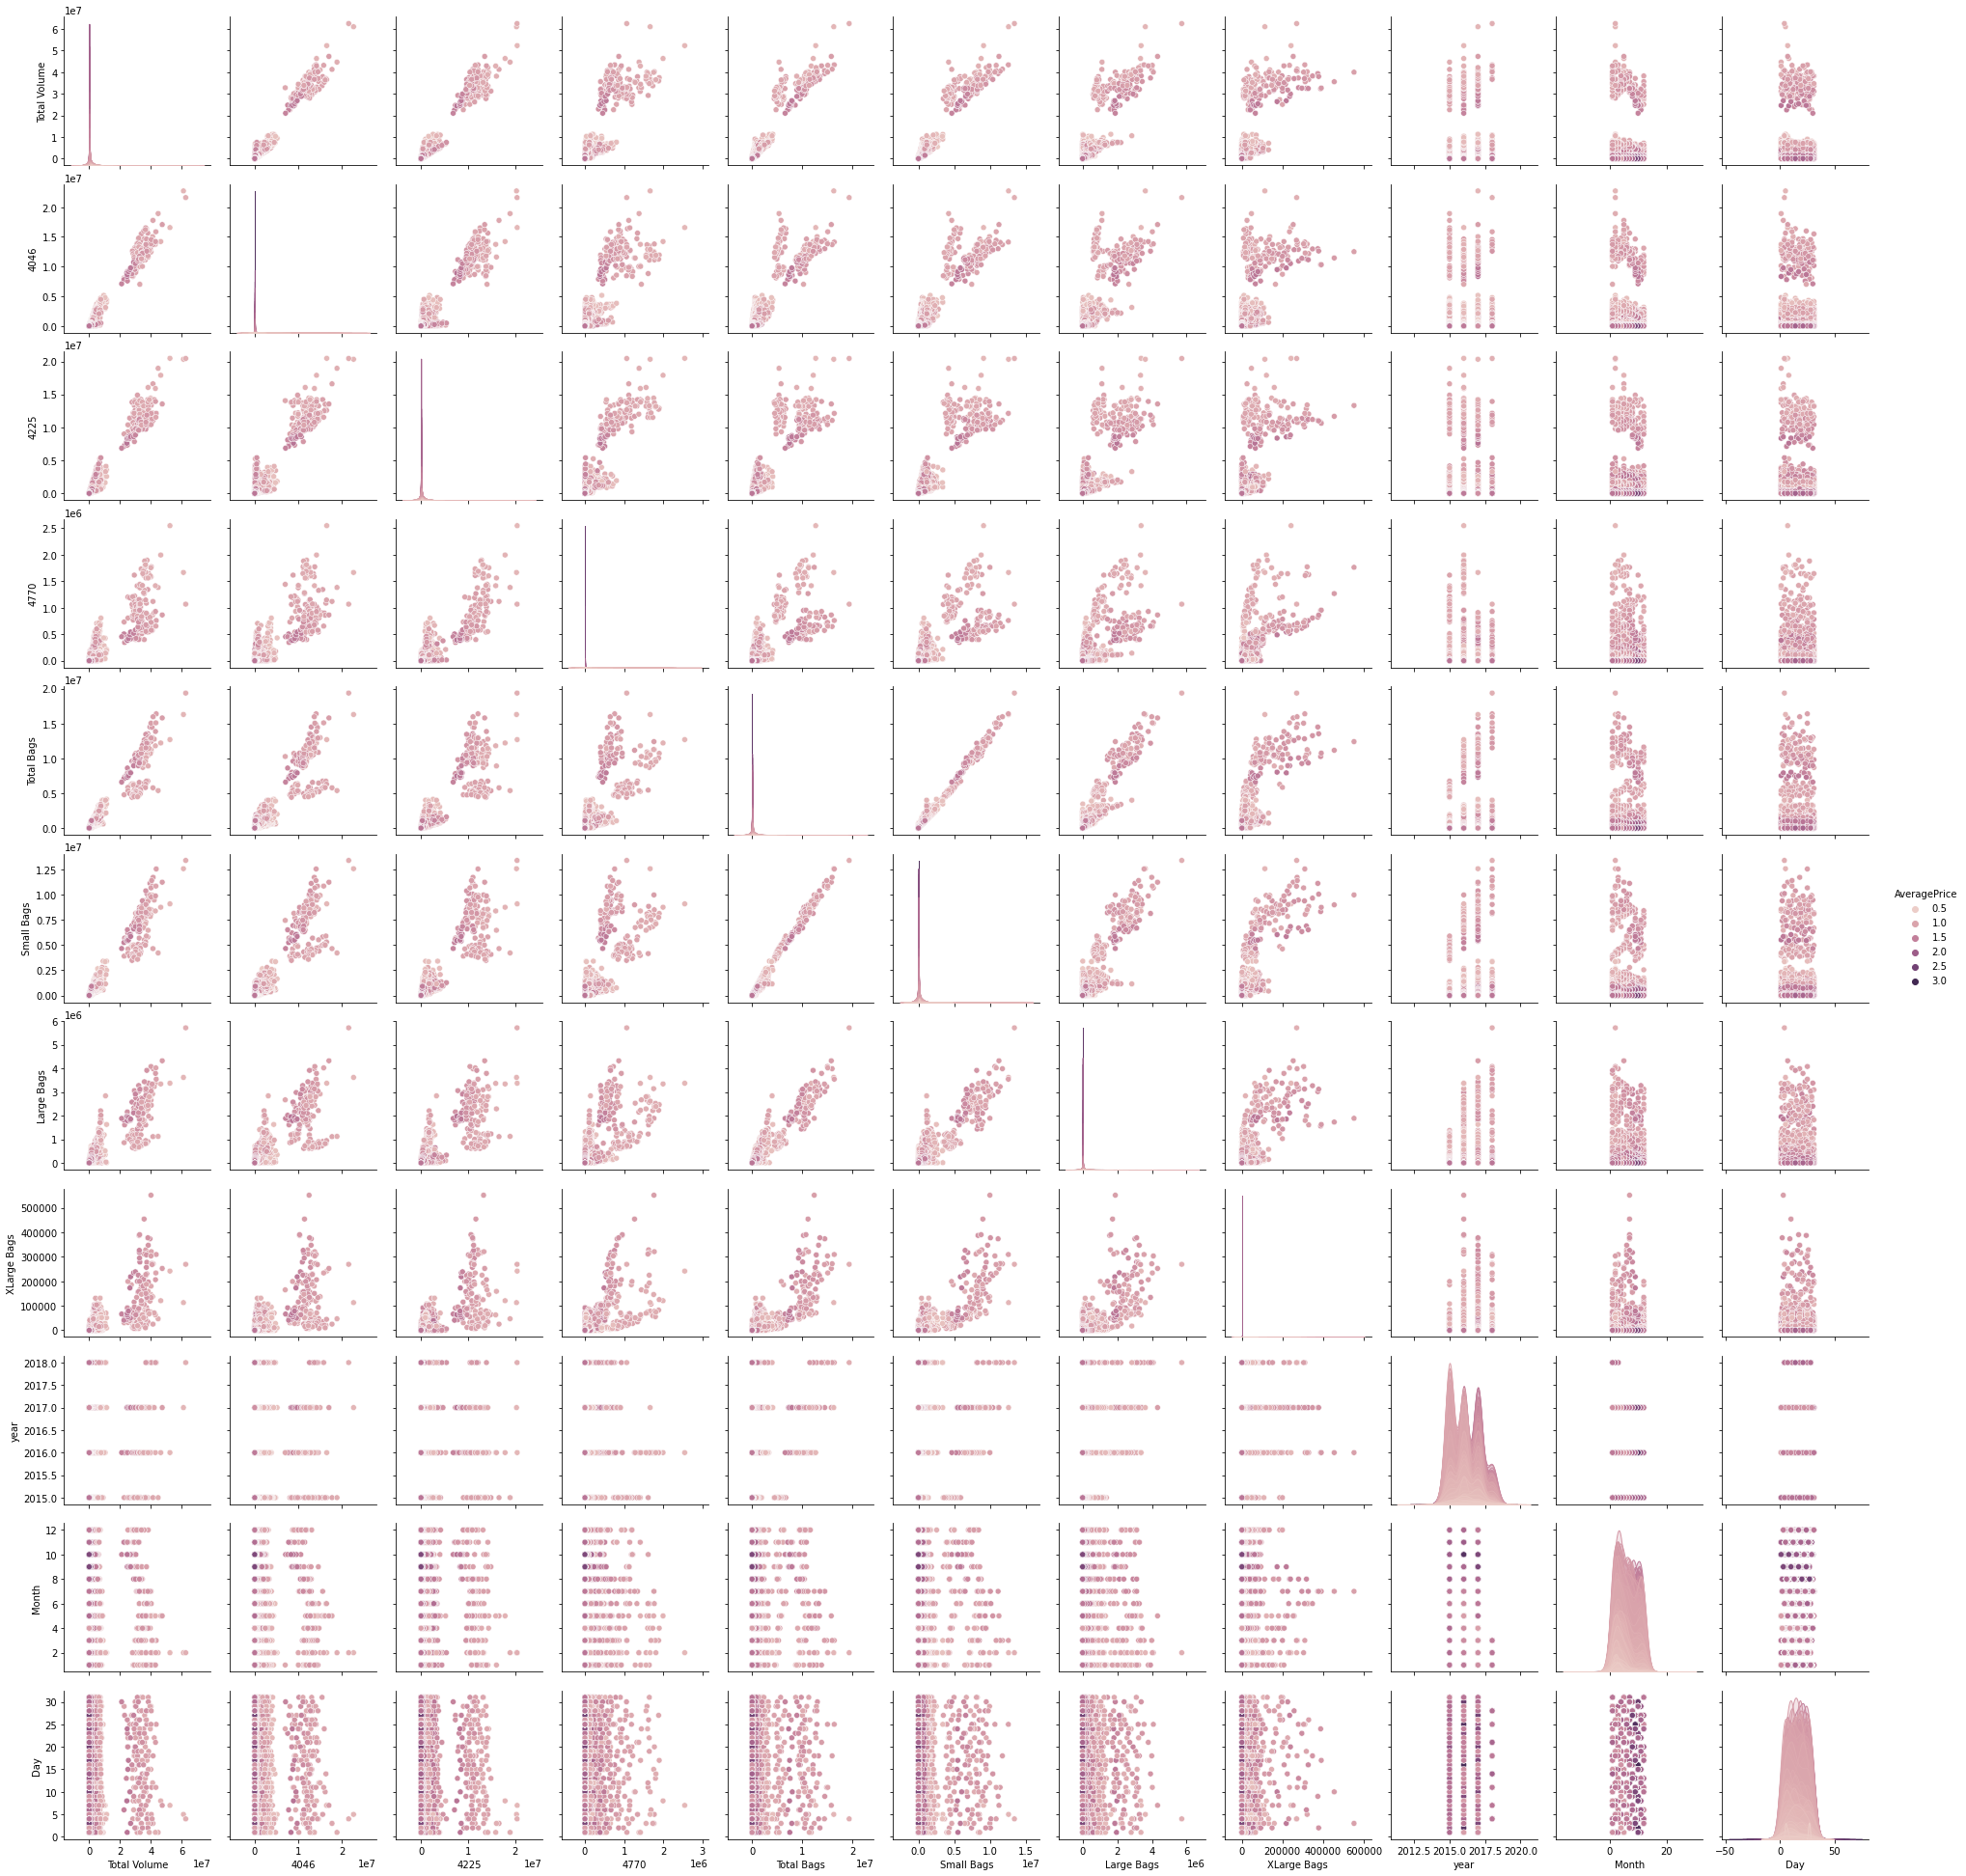

In [29]:
sns.pairplot(df,hue="AveragePrice")

**Findings:**
- linear relationships among most columns
- no / limited relationship among other columns
- correlation between features is evident, along with the presence of outliers

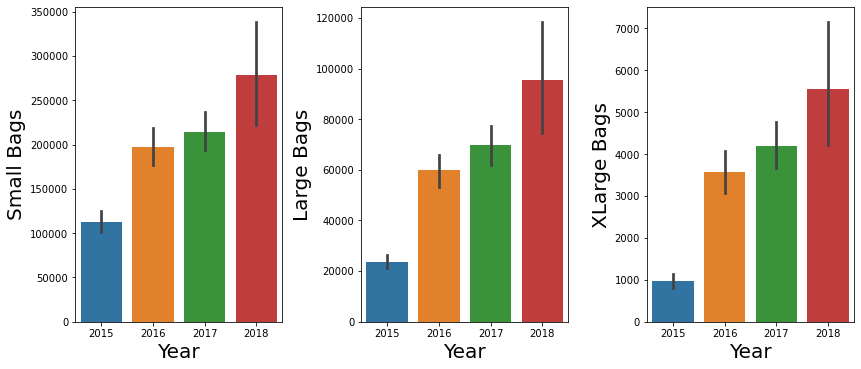

In [30]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = df[['Small Bags','Large Bags','XLarge Bags']]
X = df['year']
for col in y:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

We can see the trend in production of bags from the above visualisation.

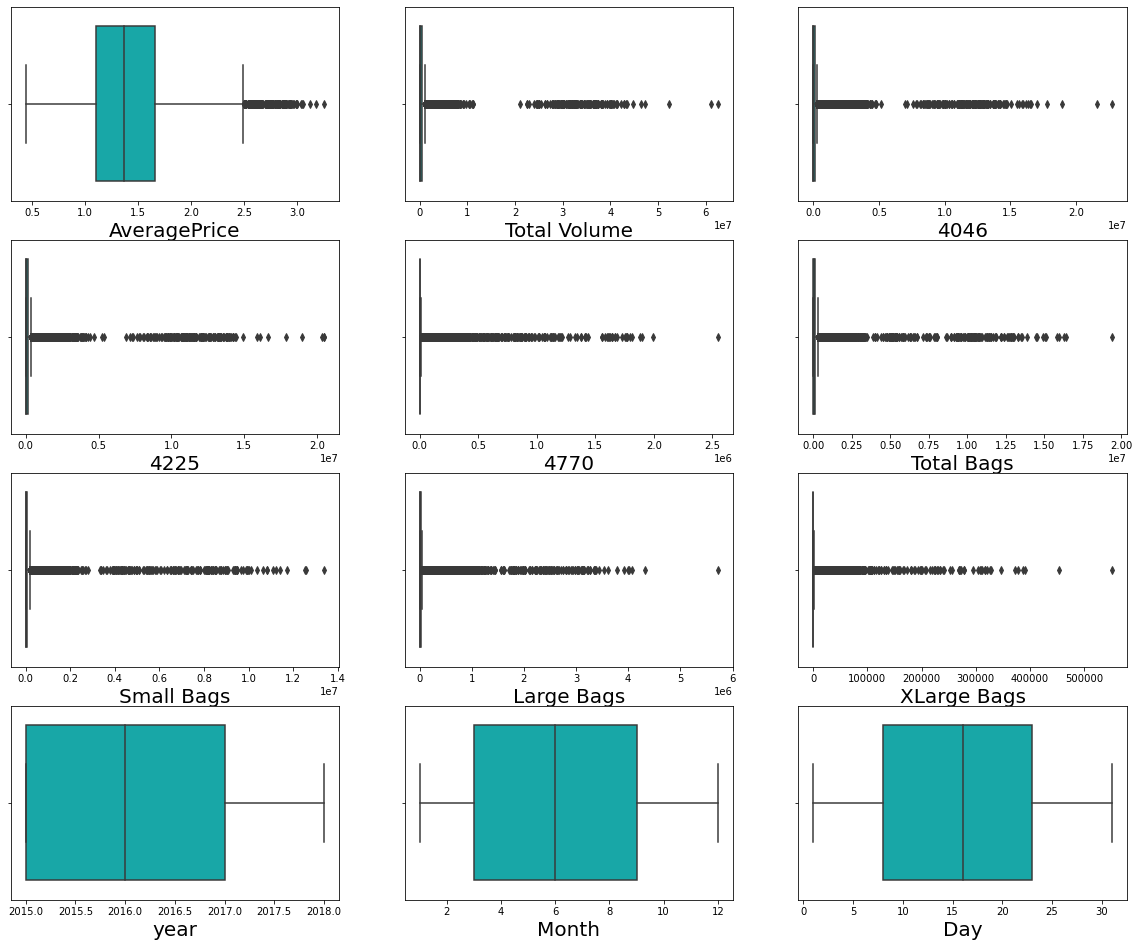

In [31]:
plt.figure(figsize=(20,25))
plotnumber=1

for col in df1:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[col],color='c')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

## Outlier Check

In [32]:
df2 = df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

In [33]:
z = np.abs(zscore(df2))
z

array([[0.22771641, 0.23081597, 0.1999022 , ..., 0.2326465 , 0.22235202,
        0.17557961],
       [0.23042664, 0.23110251, 0.20805446, ..., 0.23156838, 0.22233464,
        0.17557961],
       [0.21208462, 0.23100731, 0.1544779 , ..., 0.23339891, 0.22231148,
        0.17557961],
       ...,
       [0.24233073, 0.2306933 , 0.24309014, ..., 0.23164379, 0.22256082,
        0.17557961],
       [0.24162464, 0.2304279 , 0.24265143, ..., 0.22954271, 0.2225293 ,
        0.17557961],
       [0.24125273, 0.22934712, 0.24317042, ..., 0.22811058, 0.22262764,
        0.17557961]])

In [34]:
df3 = df[(z<3).all(axis=1)]
df3

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [35]:
print(df.shape)
print(df3.shape)

(18249, 14)
(17782, 14)


In [36]:
# data loss
(18249-17782)/18429*100

2.5340495957458353

## Skewness Check

In [37]:
df3.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [38]:
features = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

In [39]:
scaler = PowerTransformer(method='yeo-johnson')

In [40]:
df3[features] = scaler.fit_transform(df3[features].values)
df3[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [41]:
df3.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

**Findings:** Skewness has been removed from all relevant features except in the case of XLarge Bags

In [42]:
df3['XLarge Bags']=np.log1p(df3['XLarge Bags'])

In [43]:
df3.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

Skewness has not been completely removed but it is highly minimal. So, we may move ahead.

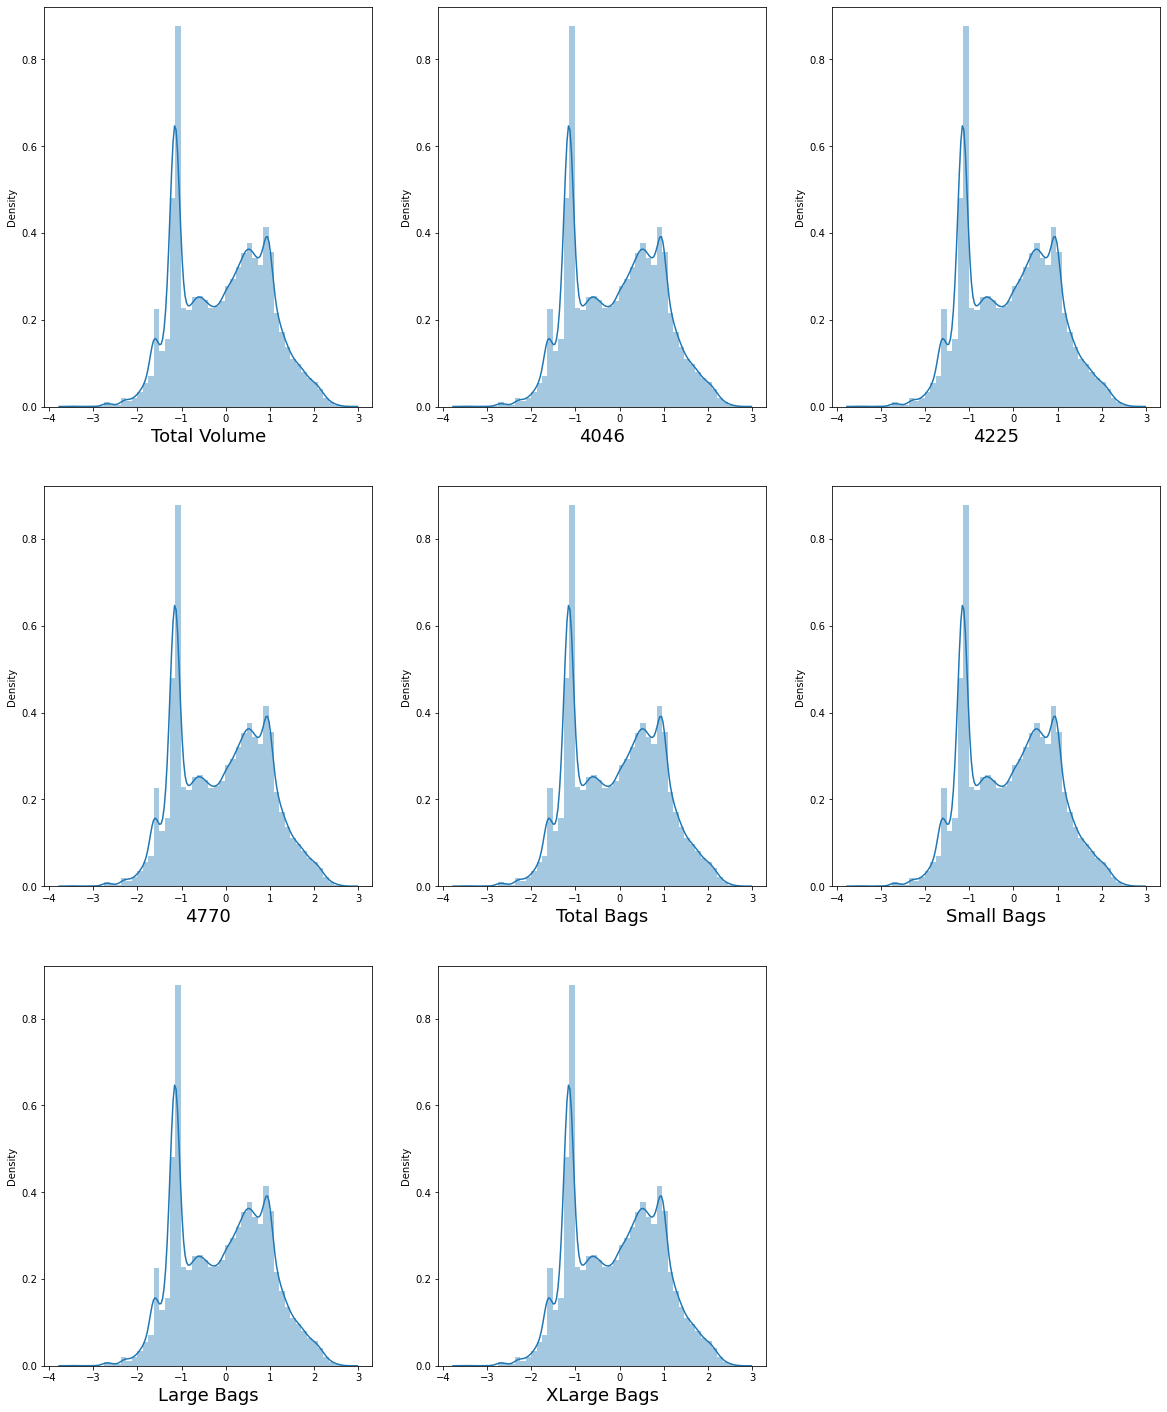

In [44]:
plt.figure(figsize=(20,25))
plotnumber=1

for col in df3[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df3[features])
        plt.xlabel(col,fontsize=18)
    plotnumber+=1
plt.show()

**Observation**: The Data Distribution is much more normalised as compared to before.

## Data Encoding

In [45]:
df_cat = ['type','region']
le = LabelEncoder()
df3[df_cat]=df3[df_cat].apply(le.fit_transform)

In [46]:
df3[df_cat]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


## Establishing Correlations

In [47]:
df3

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,0,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,0,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,0,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,0,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-1.126094,1,2018,53,2,4
18245,1.71,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-1.126094,1,2018,53,1,28
18246,1.87,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-1.126094,1,2018,53,1,21
18247,1.93,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-1.126094,1,2018,53,1,14


In [48]:
df3.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.392262,0.608447,0.099910,0.010428,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629752,-0.800828,0.076584,0.065709,-0.026332,-0.006248
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.575152,-0.725826,-0.002396,0.159390,-0.025919,-0.004558
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.583293,-0.747722,-0.004533,0.032273,-0.024708,-0.005919
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.617192,-0.780988,-0.051657,0.037805,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.612530,-0.725686,0.210924,0.065996,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.601404,-0.720466,0.185955,0.051985,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.451796,-0.500026,0.190295,0.086573,-0.016942,-0.000876
XLarge Bags,-0.392262,0.629752,0.575152,0.583293,0.617192,0.612530,0.601404,0.451796,1.000000,-0.672461,0.156202,-0.017598,0.020885,0.010991
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.672461,1.000000,0.007399,0.021970,-0.005044,-0.002469


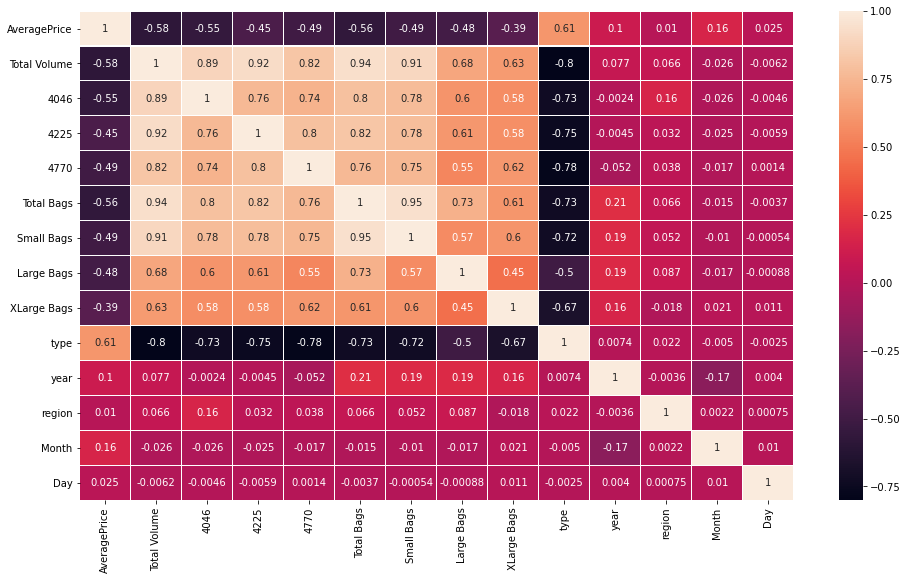

In [49]:
plt.figure(figsize=(16,9))
sns.heatmap(df3.corr(),linewidths=.1,annot=True)
plt.show()

**Findings:**
- Most features are highly negatively correlated with AveragePrice
- Few features like year and type are positively correlated with the target

## Correlation between label and features

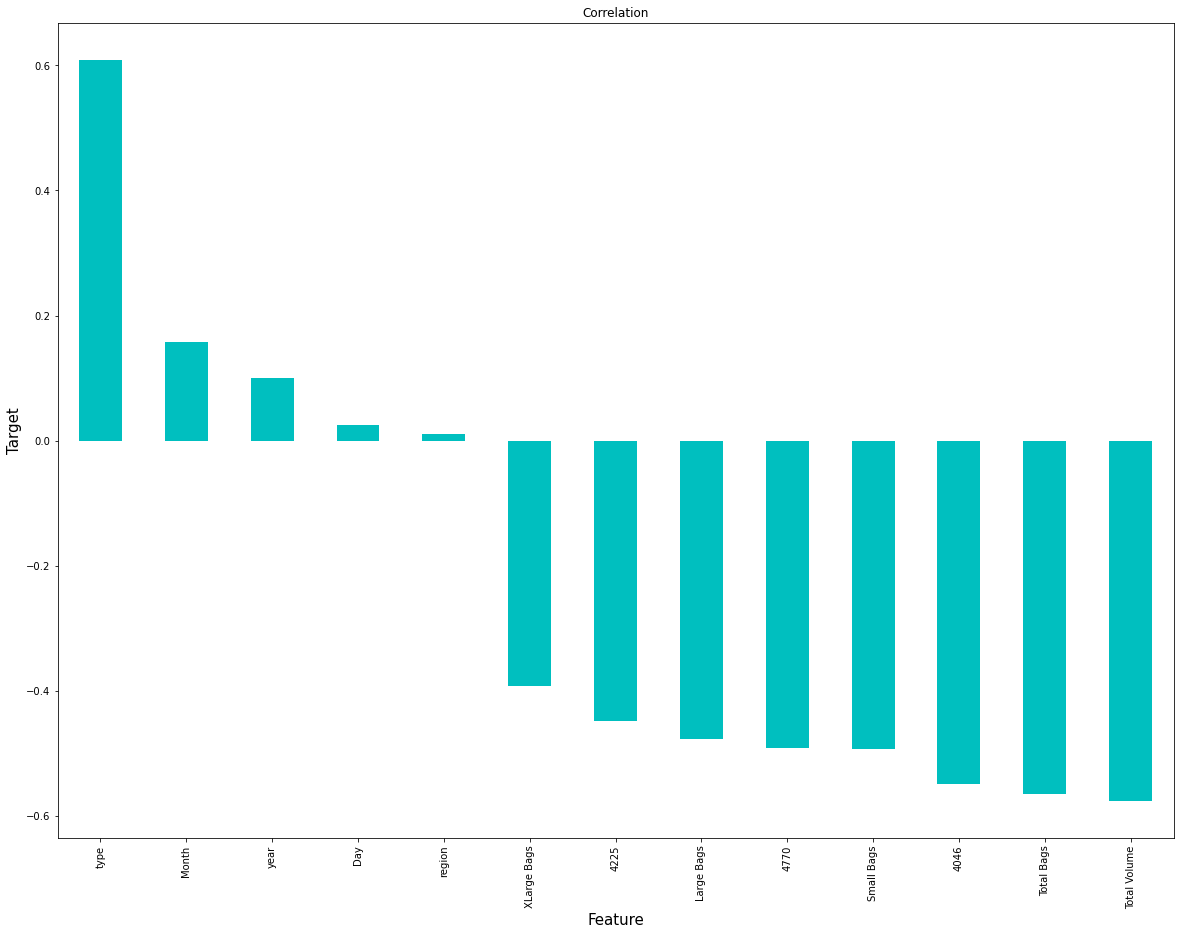

In [50]:
plt.figure(figsize=(20,15))
df3.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation")
plt.show()

**Findings:**
As evident from the heatmap and the barplot above, day and region have very low correlation with the target

In [51]:
df3.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,0,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,0,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,0,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,0,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,0,11,29


In [52]:
df3.drop('region',axis=1,inplace=True)
df3.drop('Day',axis=1,inplace=True)

In [53]:
df3.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,12
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,12
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,12
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,12
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,11


## Standard Scaler

In [54]:
x = df3.drop('AveragePrice',axis=1)
y = df3['AveragePrice']

In [55]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,1.641434
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,1.641434
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,1.641434
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,1.641434
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,1.358706
...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.685946,0.974238,1.979143,-1.185845
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.685946,0.974238,1.979143,-1.468572
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.685946,0.974238,1.979143,-1.468572
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.685946,0.974238,1.979143,-1.468572


## Multicollinearity Checks - Using VIF to solve

In [56]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF,Features
0,51.806476,Total Volume
1,6.808776,4046
2,11.158951,4225
3,3.951861,4770
4,34.441003,Total Bags
5,16.630696,Small Bags
6,3.462408,Large Bags
7,2.065369,XLarge Bags
8,3.720176,type
9,1.386160,year


## PCA

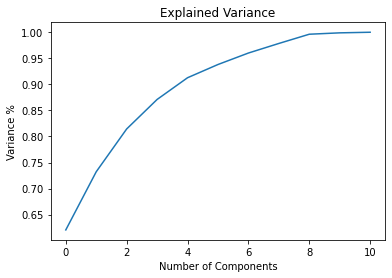

In [57]:
pca = PCA()
pr_comp = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

In [58]:
pca = PCA(n_components=11)
new_comp = pca.fit_transform(x)
pr_x = pd.DataFrame(new_comp,columns=np.arange(11))

In [59]:
pr_x

,0,1,2,3,4,5,6,7,8,9,10
0,-0.633512,-2.164099,-0.408902,-0.195089,0.490725,0.875967,-0.344783,0.335202,-0.866430,-0.025483,0.081931
1,-0.684017,-2.145838,-0.432901,-0.217714,0.476673,0.938587,-0.270188,0.205172,-0.888632,-0.025189,0.059852
2,-0.381987,-2.223960,-0.337956,-0.161509,0.523006,1.094691,-0.188170,0.557208,-0.770957,0.046724,0.242771
3,-0.612686,-2.207727,-0.360392,-0.173622,0.364372,0.996356,-0.394079,0.516588,-0.744431,-0.024541,0.191053
4,-0.728496,-2.004629,-0.183601,-0.179720,0.235558,0.986506,-0.398826,0.267942,-0.756911,-0.076051,0.102047
...,...,...,...,...,...,...,...,...,...,...,...
17777,-1.837406,2.480319,-0.222896,0.128451,0.534189,-0.326406,-0.230391,-0.008317,-0.019542,-0.097595,-0.017335
17778,-1.969598,2.595329,0.054827,0.040666,0.463375,-0.151713,-0.130817,0.251271,-0.050199,-0.166209,-0.071132
17779,-1.568260,2.300879,0.362447,-0.420920,0.818959,0.659616,0.153141,-0.262205,1.107418,0.003292,-0.053501
17780,-1.438414,2.305707,0.361047,-0.363627,0.854537,0.612557,0.159496,-0.237725,1.098158,0.008546,-0.052692


In [60]:
bf = SelectKBest(score_func = f_classif, k = 11)
fit = bf.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [61]:
fit = bf.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(22,'Score'))

         Feature      Score
8           type  49.966168
0   Total Volume  39.927250
1           4046  36.480181
4     Total Bags  35.879124
3           4770  27.651101
5     Small Bags  25.039951
6     Large Bags  23.354747
2           4225  21.772853
7    XLarge Bags  15.635424
9           year   3.163539
10         Month   2.850599


In [62]:
df3

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,12
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,12
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,12
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,12
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-1.126094,1,2018,2
18245,1.71,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-1.126094,1,2018,1
18246,1.87,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-1.126094,1,2018,1
18247,1.93,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-1.126094,1,2018,1


On comparison of various checks performed, it appears it would not be advisable to drop any columns.

## Model Building

Since predicting the average price is not a classification problem, we are going to apply regression models for our prediction. Following are the models that are going to be used:

- Linear Regression
- Random Forest Regressor
- Support Vector Regression (SVR)
- Ridge Regression
- Lasso Regression

In [63]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8825806014370718 on random_state: 11


In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state =66)

In [65]:
lr = LinearRegression()
rf = RandomForestRegressor()
svr = SVR()
ridge = Ridge()
lasso = Lasso()

In [66]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
svr.fit(x_train,y_train)
ridge.fit(x_train,y_train)
lasso.fit(x_train,y_train)

Lasso()

In [67]:
print("-"*50)
print("Linear Regression Model")
print("-"*50)
lr_pred = lr.predict(x_test)
print("R2 Score: ", r2_score(y_test,lr_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,lr_pred), "\n"*2)

print("-"*50)
print("Random Forest Model")
print("-"*50)
rf_pred = rf.predict(x_test)
print("R2 Score: ", r2_score(y_test,rf_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,rf_pred), "\n"*2)

print("-"*50)
print("Support Vector Regression Model")
print("-"*50)
svr_pred = svr.predict(x_test)
print("R2 Score: ", r2_score(y_test,svr_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,svr_pred), "\n"*2)

print("-"*50)
print("Ridge Model")
print("-"*50)
ridge_pred = ridge.predict(x_test)
print("R2 Score: ", r2_score(y_test,ridge_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,ridge_pred), "\n"*2)

print("-"*50)
print("Lasso Model")
print("-"*50)
lasso_pred = lasso.predict(x_test)
print("R2 Score: ", r2_score(y_test,lasso_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,lasso_pred), "\n"*2)

--------------------------------------------------
Linear Regression Model
--------------------------------------------------
R2 Score:  0.5698003756006771 

Mean Squared Error:  0.07189754261865554 


--------------------------------------------------
Random Forest Model
--------------------------------------------------
R2 Score:  0.8811918590619781 

Mean Squared Error:  0.019855929415237568 


--------------------------------------------------
Support Vector Regression Model
--------------------------------------------------
R2 Score:  0.780754673516169 

Mean Squared Error:  0.03664159453142725 


--------------------------------------------------
Ridge Model
--------------------------------------------------
R2 Score:  0.5697986284920649 

Mean Squared Error:  0.07189783460593023 


--------------------------------------------------
Lasso Model
--------------------------------------------------
R2 Score:  -0.00033978384841715226 

Mean Squared Error:  0.16718278716026566 




## Model Cross Validation

In [68]:
print("Cross Validation Score for Linear Regression Model: ", cross_val_score(lr,x,y,cv=5).mean(), "\n"*2)
print("Cross Validation Score for Random Forest Model: ", cross_val_score(rf,x,y,cv=5).mean(), "\n"*2)
print("Cross Validation Score for Support Vector Regression Model: ", cross_val_score(svr,x,y,cv=5).mean(), "\n"*2)
print("Cross Validation Score for Ridge Model: ", cross_val_score(ridge,x,y,cv=5).mean(), "\n"*2)
print("Cross Validation Score for Lasso Model: ", cross_val_score(lasso,x,y,cv=5).mean())

Cross Validation Score for Linear Regression Model:  0.22215096483154015 


Cross Validation Score for Random Forest Model:  0.1939191627529755 


Cross Validation Score for Support Vector Regression Model:  0.19228045884536615 


Cross Validation Score for Ridge Model:  0.22212400105394595 


Cross Validation Score for Lasso Model:  -1.2004309324076277


### It is evident from above that Random Forest is the best model

## Hyperparameter Tuning

In [69]:
parameter = {'n_estimators':[30,60],
             'max_depth': [10,20],
             'min_samples_leaf':[5,10],
             'min_samples_split':[5,10],
             'criterion':['mse','mae'],
             'max_features':["auto","sqrt","log2"]
            }

In [70]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [ ]:
GridCV.fit(x_train,y_train)

In [ ]:
GridCV.best_params_

#### NOTE: Hyperparameter tuning has been run twice (taking about 2 hours each). Kernel had to be interrupted the third time. Parameters used in the next steps are from the actual results obtained from the GridSearch

In [71]:
Best_mod = RandomForestRegressor(n_estimators = 60,
                                 criterion = 'mse', 
                                 max_depth= 20, 
                                 max_features = 'auto',
                                 min_samples_leaf = 5, 
                                 min_samples_split = 10)

In [72]:
Best_mod.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=60)

In [73]:
rfpred = Best_mod.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)

86.21749026338561


### We can see that the model is giving an accuracy of 86.21%

## Saving the Model

In [74]:
import joblib
joblib.dump(Best_mod,"BestModelAvocado.pkl")

['BestModelAvocado.pkl']

## Loading the model

In [75]:
mod=joblib.load("BestModelAvocado.pkl")

In [76]:
print(mod.predict(x_test))

[1.50402319 1.73349667 1.1840383  ... 1.53612259 1.0056349  1.61415542]


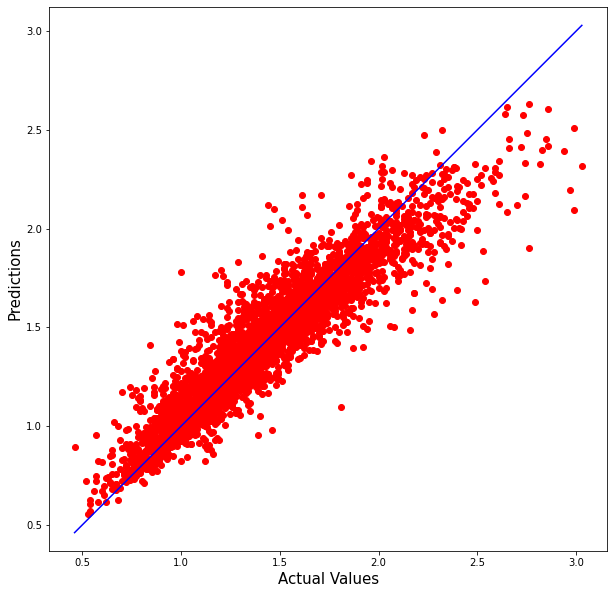

In [77]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, rfpred, c='red')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(rfpred), max(y_test))
p2 = min(min(rfpred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [79]:
a = np.array(y_test)
predicted = np.array(mod.predict(x_test))
df_final = pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df_final

,Original,Predicted
0,1.47,1.504023
1,1.33,1.733497
2,1.15,1.184038
3,1.43,1.399988
4,1.09,1.083013
...,...,...
3552,0.99,1.012078
3553,1.76,1.982538
3554,1.54,1.536123
3555,0.98,1.005635


## Case 2 - Region is the target/label
<br>
For this, since the target or dependent variable data is categorical in nature, we will use classification to build our model.

In [80]:
df_region =pd.read_csv('avocado.csv')
df_region

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [81]:
df_region['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [82]:
lbl = LabelEncoder()
df_region['region'] = lbl.fit_transform(df_region['region'])

In [83]:
df_region['region']

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

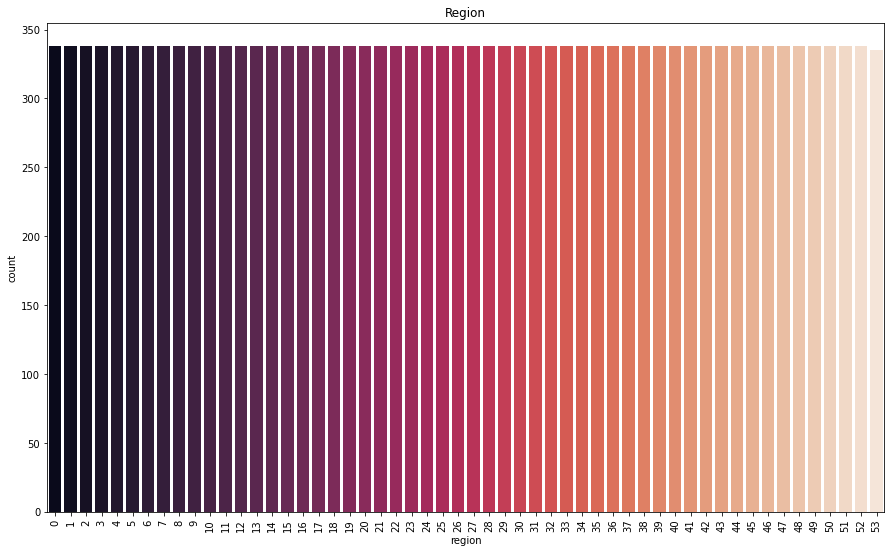

In [84]:
plt.figure(figsize=(15,9))
sns.countplot(df_region['region'],palette="rocket")
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

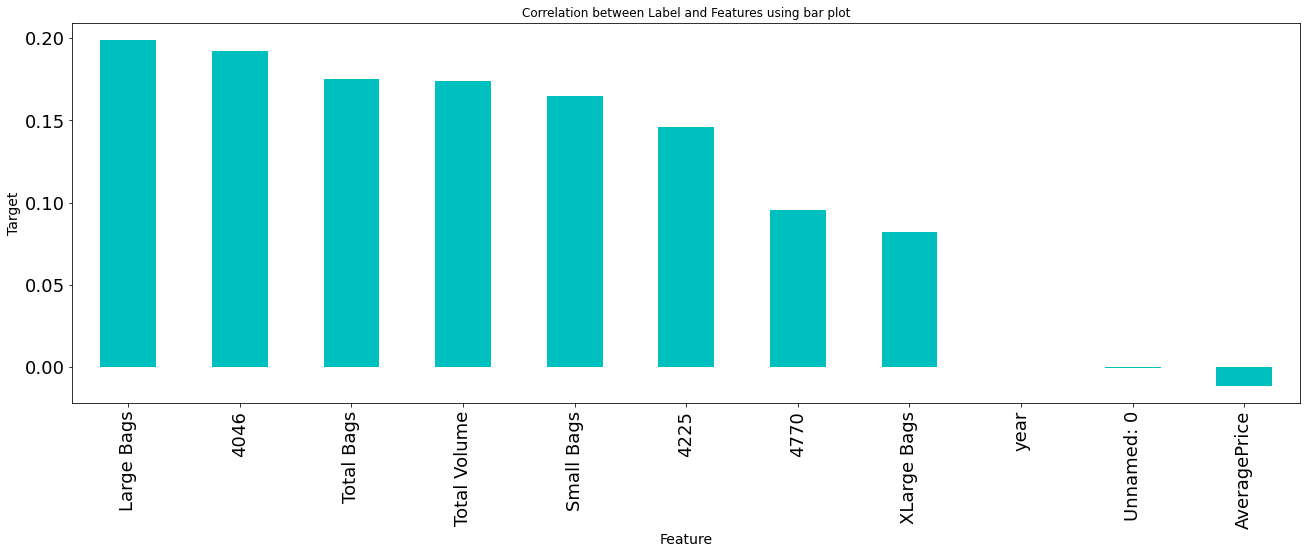

In [85]:
plt.figure(figsize=(22,7))
df_region.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c',fontsize=18)
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title("Correlation between Label and Features using bar plot")
plt.show()

In [86]:
df_region.drop("Unnamed: 0",axis=1,inplace=True)
df_region.drop("year",axis=1,inplace=True)

In [87]:
df_region['Date'] = pd.to_datetime(df_region['Date'])
df_region['Month'] = df_region['Date'].dt.month
df_region['Day'] = df_region['Date'].dt.day

In [88]:
df_region.drop("Date",axis=1,inplace=True)

In [89]:
df_region.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,0,11,29


In [90]:
df_region['type']= lbl.fit_transform(df_region['type'])

In [91]:
x = df_region.drop(['region'], axis =1)
y = df_region['region']

In [92]:
df_region_2 = df_region[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

In [93]:
z = np.abs(zscore(df_region_2))
z

array([[0.22771641, 0.23081597, 0.1999022 , ..., 0.2326465 , 0.22235202,
        0.17557961],
       [0.23042664, 0.23110251, 0.20805446, ..., 0.23156838, 0.22233464,
        0.17557961],
       [0.21208462, 0.23100731, 0.1544779 , ..., 0.23339891, 0.22231148,
        0.17557961],
       ...,
       [0.24233073, 0.2306933 , 0.24309014, ..., 0.23164379, 0.22256082,
        0.17557961],
       [0.24162464, 0.2304279 , 0.24265143, ..., 0.22954271, 0.2225293 ,
        0.17557961],
       [0.24125273, 0.22934712, 0.24317042, ..., 0.22811058, 0.22262764,
        0.17557961]])

In [94]:
df_region_3 = df_region[(z<3).all(axis=1)]
df_region_3

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53,1,14


In [95]:
print(df_region.shape)
print(df_region_3.shape)

(18249, 13)
(17782, 13)


In [96]:
# data loss
(18249-17782)/18429*100

2.5340495957458353

In [97]:
df_region_3

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53,1,14


## Skewness Check

In [98]:
df_region_3.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
region          0.005773
Month           0.098217
Day             0.011251
dtype: float64

In [99]:
features = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

In [100]:
scaler = PowerTransformer(method='yeo-johnson')

In [101]:
df_region_3[features] = scaler.fit_transform(df_region_3[features].values)
df_region_3[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [102]:
df_region_3.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
type           -0.052210
region          0.005773
Month           0.098217
Day             0.011251
dtype: float64

**Findings:** Skewness has been removed from all relevant features except in the case of XLarge Bags

In [103]:
df_region_3['XLarge Bags']=np.log1p(df_region_3['XLarge Bags'])

In [104]:
df_region_3.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
type           -0.052210
region          0.005773
Month           0.098217
Day             0.011251
dtype: float64

Skewness has not been completely removed but it is highly minimal. So, we may move ahead.

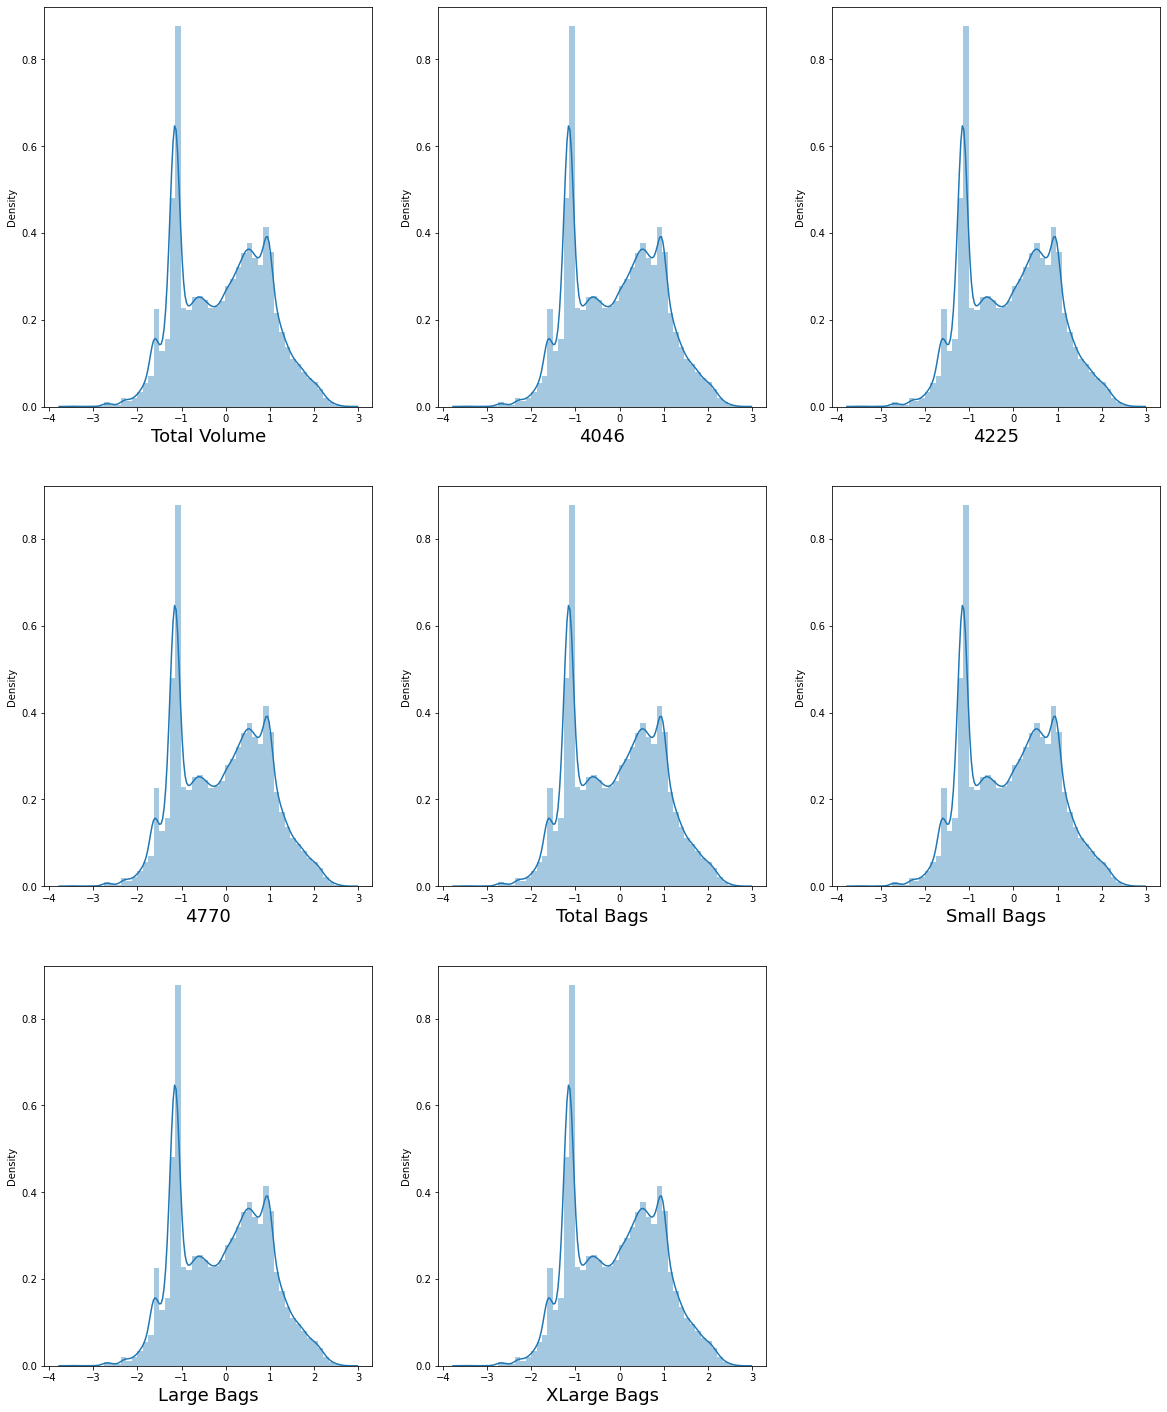

In [106]:
plt.figure(figsize=(20,25))
plotnumber=1

for col in df_region_3[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_region_3[features])
        plt.xlabel(col,fontsize=18)
    plotnumber+=1
plt.show()

In [107]:
df_region_3.drop('Day',axis=1,inplace=True)

In [108]:
x = df_region_3.drop(['region'], axis =1)
y = df_region_3['region']

In [109]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Month
0,-0.212660,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.685946,-1.026443,1.641434
1,-0.162942,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.685946,-1.026443,1.641434
2,-1.207026,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.685946,-1.026443,1.641434
3,-0.834139,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.685946,-1.026443,1.641434
4,-0.336956,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.685946,-1.026443,1.358706
...,...,...,...,...,...,...,...,...,...,...,...
17777,0.533114,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.685946,0.974238,-1.185845
17778,0.731987,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.685946,0.974238,-1.468572
17779,1.129733,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.685946,0.974238,-1.468572
17780,1.278888,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.685946,0.974238,-1.468572


## Model Building

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.5341579983131852  on Random_State  79


In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=79)

In [112]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.5341579983131852
[[47  0  0 ...  0  0  0]
 [ 0 19  0 ...  0  0  0]
 [ 0  0 47 ...  0  0  4]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 52  0]
 [ 0  2  0 ...  0  0 15]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        74
           1       0.22      0.33      0.27        57
           2       0.81      0.59      0.69        79
           3       0.46      0.30      0.37        69
           4       0.52      0.45      0.48        74
           5       0.57      0.57      0.57        76
           6       0.74      0.88      0.80        51
           7       0.59      0.43      0.50        76
           8       0.69      0.81      0.74        75
           9       0.55      0.71      0.62        68
          10       0.51      0.47      0.49        62
          11       0.54      0.72      0.62        71
          12       0.52      0.54      0.53        72
          13       0.45      0.23      0.30        75
          14  

In [113]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.8973854371661513
[[68  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  0]
 [ 0  0 76 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 62  0]
 [ 0  0  1 ...  0  0 50]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        74
           1       0.84      0.84      0.84        57
           2       0.94      0.96      0.95        79
           3       0.85      0.81      0.83        69
           4       0.88      0.93      0.91        74
           5       0.93      0.86      0.89        76
           6       1.00      0.98      0.99        51
           7       0.93      0.87      0.90        76
           8       0.97      0.96      0.97        75
           9       0.92      0.87      0.89        68
          10       0.85      0.84      0.85        62
          11       0.93      0.99      0.96        71
          12       0.92      0.97      0.95        72
          13       0.90      0.80      0.85        75
          14  

In [114]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.7967388248524037
[[54  0  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  1]
 [ 0  0 72 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 58  0]
 [ 0  0  0 ...  0  0 45]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        74
           1       0.68      0.74      0.71        57
           2       0.96      0.91      0.94        79
           3       0.76      0.77      0.76        69
           4       0.83      0.80      0.81        74
           5       0.72      0.79      0.75        76
           6       0.98      0.92      0.95        51
           7       0.92      0.75      0.83        76
           8       0.96      0.93      0.95        75
           9       0.81      0.84      0.83        68
          10       0.78      0.65      0.71        62
          11       0.87      0.83      0.85        71
          12       0.89      0.88      0.88        72
          13       0.74      0.65      0.70        75
          14  

In [115]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print(accuracy_score(y_test, predsv))
print(confusion_matrix(y_test, predsv))
print(classification_report(y_test, predsv))

0.7795895417486646
[[72  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 75 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 59  0]
 [ 0  1  2 ...  0  0 38]]
              precision    recall  f1-score   support

           0       0.67      0.97      0.79        74
           1       0.49      0.51      0.50        57
           2       0.93      0.95      0.94        79
           3       0.85      0.64      0.73        69
           4       0.87      0.80      0.83        74
           5       0.79      0.72      0.75        76
           6       1.00      0.98      0.99        51
           7       0.88      0.74      0.80        76
           8       0.97      0.93      0.95        75
           9       0.74      0.71      0.72        68
          10       0.60      0.85      0.70        62
          11       0.78      0.94      0.85        71
          12       0.89      0.94      0.92        72
          13       0.65      0.63      0.64        75
          14  

## Model Cross Validation

In [116]:
scr1 = cross_val_score(lr,x,y,cv=5)
print('Cross validation score for LogisticRegression is ',scr1.mean())

scr2 = cross_val_score(RF,x,y,cv=5)
print('Cross validation score for RandomForest is', scr2.mean())

scr3 = cross_val_score(dt,x,y,cv=5)
print('Cross validation score for DecisionTree is ', scr3.mean())

scr4 = cross_val_score(svc,x,y,cv=5)
print('Cross validation score for SVC is', scr4.mean())

Cross validation score for LogisticRegression is  0.3666626557117526
Cross validation score for RandomForest is 0.6570056413738274
Cross validation score for DecisionTree is  0.5314304277469954
Cross validation score for SVC is 0.561514550279191


**Findings:** Based on the accuracy and cross validation scores, it appears that Random Forest is the best model.

## Hyperparameter Tuning

In [117]:
parameters={"n_estimators":[10,20,30],'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2']}
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10}

In [118]:
y_pred = clf.predict(x_test)
print("accuracy_score :",accuracy_score(y_test, y_pred))
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))

accuracy_score : 0.9977509136913129
Confusion matrix 
 [[74  0  0 ...  0  0  0]
 [ 0 57  0 ...  0  0  0]
 [ 0  0 79 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  0  0 ...  0  0 68]]
classification report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        74
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00        69
           4       0.99      1.00      0.99        74
           5       1.00      0.99      0.99        76
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        76
           8       1.00      1.00      1.00        75
           9       1.00      1.00      1.00        68
          10       1.00      1.00      1.00        62
          11       1.00      1.00      1.00        71
          12       1.00      1.00      1.00        72
        

#### Thus, our model accuracy with Random Forest Classifier is 100%

## Saving the model

In [120]:
joblib.dump(clf,"BestModelAvocado_region.pkl")

['BestModelAvocado_region.pkl']

# `END`